<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Creating-df_rape" data-toc-modified-id="Creating-df_rape-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating df_rape</a></span></li><li><span><a href="#Data-Cleanup" data-toc-modified-id="Data-Cleanup-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleanup</a></span></li><li><span><a href="#Creation-of-datetime-column" data-toc-modified-id="Creation-of-datetime-column-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creation of datetime column</a></span></li><li><span><a href="#Prepping-for-model" data-toc-modified-id="Prepping-for-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepping for model</a></span></li><li><span><a href="#Creating-dummies-for-df_model" data-toc-modified-id="Creating-dummies-for-df_model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Creating dummies for df_model</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Run-the-model" data-toc-modified-id="Run-the-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Run the model</a></span></li></ul></div>

In [ ]:
# Note: A 538 Article on Sexual Assault
# https://projects.fivethirtyeight.com/sexual-assault-victims/

# Exploratory Data Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Data from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [4]:
df.shape

(6048796, 24)

In [5]:
df.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
dtype: object

In [6]:
# Taking the subset of this data, the 16673 rows specifically about rape
df['OFNS_DESC'].value_counts()

PETIT LARCENY                           987326
HARRASSMENT 2                           736479
ASSAULT 3 & RELATED OFFENSES            625624
CRIMINAL MISCHIEF & RELATED OF          603977
GRAND LARCENY                           516544
DANGEROUS DRUGS                         392992
OFF. AGNST PUB ORD SENSBLTY &           327716
ROBBERY                                 228220
FELONY ASSAULT                          224921
BURGLARY                                216439
MISCELLANEOUS PENAL LAW                 145888
DANGEROUS WEAPONS                       143395
OFFENSES AGAINST PUBLIC ADMINI          117062
GRAND LARCENY OF MOTOR VEHICLE          114071
INTOXICATED & IMPAIRED DRIVING           85349
CRIMINAL TRESPASS                        74083
VEHICLE AND TRAFFIC LAWS                 72173
SEX CRIMES                               68020
THEFT-FRAUD                              66184
FORGERY                                  61024
FRAUDS                                   38308
POSSESSION OF

In [ ]:
# Non-meaningful columns that need to be deleted 
# KY_CD: Meaningless- identical in subset of rape data
# PD_DESC: identical to PD_CD
# LAW_CAT_CD
# JURIS_DESC
# LOC_OF_OCCUR_DESC
# PARKS_NM
# HADEVELOPT
# X_COORD_CD
# Y_COORD_CD
# Latitude
# Longitude
# Lat_Lon

In [7]:
df = df.drop(['KY_CD','PD_DESC','LAW_CAT_CD','JURIS_DESC','LOC_OF_OCCUR_DESC','PARKS_NM','HADEVELOPT','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Lat_Lon'], axis = 1)

# Creating df_rape

In [8]:
df_rape = df.loc[df['OFNS_DESC'] == 'RAPE']

In [9]:
df_rape.shape

(16673, 12)

In [10]:
df_rape.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
21,340513307,04/06/2015,12:00:00,04/10/2015,18:00:00,12/21/2015,RAPE,155.0,COMPLETED,QUEENS,110.0,OTHER
252,198273659,12/01/2009,10:00:00,01/01/2010,10:00:00,12/07/2015,RAPE,157.0,COMPLETED,BROOKLYN,66.0,RESIDENCE - APT. HOUSE
821,591506102,12/30/2015,18:00:00,12/30/2015,23:00:00,12/31/2015,RAPE,157.0,COMPLETED,QUEENS,102.0,RESIDENCE-HOUSE
1079,283109223,08/01/2015,00:01:00,12/30/2015,22:25:00,12/31/2015,RAPE,153.0,COMPLETED,MANHATTAN,25.0,RESIDENCE - APT. HOUSE
1754,361697946,12/30/2015,03:04:00,12/30/2015,05:19:00,12/30/2015,RAPE,157.0,COMPLETED,MANHATTAN,20.0,HOTEL/MOTEL


In [11]:
# The outcome variable, rape completed vs attempted
df_rape['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    14843
ATTEMPTED     1830
Name: CRM_ATPT_CPTD_CD, dtype: int64

# Data Cleanup

In [12]:
df_rape.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           1
CMPLNT_FR_TM           0
CMPLNT_TO_DT        3604
CMPLNT_TO_TM        3598
RPT_DT                 0
OFNS_DESC              0
PD_CD                  0
CRM_ATPT_CPTD_CD       0
BORO_NM                4
ADDR_PCT_CD            4
PREM_TYP_DESC         63
dtype: int64

In [13]:
# Dropping Nulls
df_rape = df_rape.dropna(subset=['PREM_TYP_DESC','BORO_NM'])

In [15]:
# Dropping Nulls
df_rape.loc[df_rape['CMPLNT_FR_DT'].isna(), 'CMPLNT_FR_DT'] = df_rape.loc[df_rape['CMPLNT_FR_DT'].isna(), 'CMPLNT_TO_DT']

In [16]:
df_rape.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           0
CMPLNT_FR_TM           0
CMPLNT_TO_DT        3590
CMPLNT_TO_TM        3585
RPT_DT                 0
OFNS_DESC              0
PD_CD                  0
CRM_ATPT_CPTD_CD       0
BORO_NM                0
ADDR_PCT_CD            0
PREM_TYP_DESC          0
dtype: int64

In [17]:
# Check cells
df_rape.sort_values(by='CMPLNT_FR_TM', ascending=False)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
3725023,413481078,06/25/2005,24:00:00,NaN,NaN,07/24/2008,RAPE,157.0,COMPLETED,BRONX,49.0,RESIDENCE-HOUSE
3841346,635227790,08/01/2006,24:00:00,09/30/2006,24:00:00,05/07/2008,RAPE,157.0,COMPLETED,STATEN ISLAND,123.0,RESIDENCE-HOUSE
3601184,357409136,01/01/2007,24:00:00,10/13/2008,24:00:00,10/14/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - APT. HOUSE
3179713,678406708,04/01/2004,24:00:00,06/01/2005,23:59:00,08/12/2009,RAPE,157.0,COMPLETED,QUEENS,113.0,RESIDENCE-HOUSE
3379603,282308644,01/01/2004,24:00:00,12/31/2004,23:59:00,03/26/2009,RAPE,157.0,COMPLETED,BROOKLYN,67.0,RESIDENCE-HOUSE
4100307,920549674,08/01/2000,24:00:00,NaN,NaN,11/06/2007,RAPE,157.0,COMPLETED,BROOKLYN,67.0,RESIDENCE-HOUSE
3372363,486159316,03/28/2009,24:00:00,NaN,NaN,03/31/2009,RAPE,153.0,COMPLETED,BRONX,43.0,RESIDENCE - APT. HOUSE
3894448,268184195,03/30/2008,24:00:00,NaN,NaN,03/31/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - PUBLIC HOUSING
3838102,937145860,10/12/2007,24:00:00,NaN,NaN,05/09/2008,RAPE,157.0,COMPLETED,MANHATTAN,6.0,RESIDENCE - APT. HOUSE
3639701,550075977,07/27/2006,24:00:00,09/01/2006,00:01:00,09/18/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - APT. HOUSE


In [18]:
df_rape.sort_values(by='CMPLNT_TO_TM', ascending=False)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
3194609,271591557,03/21/2000,00:01:00,03/28/2000,24:00:00,08/02/2009,RAPE,157.0,COMPLETED,MANHATTAN,26.0,RESIDENCE - APT. HOUSE
3780568,228835328,05/01/2008,19:00:00,05/31/2008,24:00:00,06/17/2008,RAPE,157.0,COMPLETED,BRONX,48.0,RESIDENCE-HOUSE
3365325,435656502,02/23/2008,23:20:00,02/23/2008,24:00:00,04/05/2009,RAPE,157.0,COMPLETED,MANHATTAN,19.0,RESIDENCE - APT. HOUSE
3475521,236062851,06/20/2008,00:01:00,06/20/2008,24:00:00,01/14/2009,RAPE,153.0,COMPLETED,QUEENS,101.0,RESIDENCE - APT. HOUSE
4313564,570578651,07/01/2006,10:00:00,04/01/2007,24:00:00,06/21/2007,RAPE,153.0,COMPLETED,STATEN ISLAND,122.0,RESIDENCE-HOUSE
4121608,765672998,05/07/2007,00:01:00,10/20/2007,24:00:00,10/23/2007,RAPE,153.0,COMPLETED,BROOKLYN,66.0,RESIDENCE-HOUSE
3364162,104869755,01/01/2003,00:01:00,12/31/2004,24:00:00,04/06/2009,RAPE,157.0,COMPLETED,BROOKLYN,67.0,RESIDENCE-HOUSE
4121627,342073023,12/07/2002,00:01:00,12/07/2002,24:00:00,10/23/2007,RAPE,153.0,COMPLETED,BRONX,46.0,RESIDENCE - APT. HOUSE
3680201,984301010,02/15/2008,23:00:00,07/14/2008,24:00:00,08/22/2008,RAPE,155.0,COMPLETED,BROOKLYN,73.0,RESIDENCE - APT. HOUSE
3747753,756854942,05/03/2008,08:00:00,05/10/2008,24:00:00,07/09/2008,RAPE,153.0,COMPLETED,BRONX,44.0,RESIDENCE - APT. HOUSE


In [19]:
# Get rid of troublesome 24:00:00 values in 'From Time'
df_rape.loc[df_rape['CMPLNT_FR_TM'] == '24:00:00', 'CMPLNT_FR_TM'] = '23:59:59'

In [20]:
# Get rid of troublesome 24:00:00 values in 'To Time'
df_rape.loc[df_rape['CMPLNT_TO_TM'] == '24:00:00', 'CMPLNT_TO_TM'] = '23:59:59'

In [21]:
# Check Cells

df_rape.sort_values(by='CMPLNT_FR_TM', ascending=False)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
3725023,413481078,06/25/2005,23:59:59,NaN,NaN,07/24/2008,RAPE,157.0,COMPLETED,BRONX,49.0,RESIDENCE-HOUSE
3841346,635227790,08/01/2006,23:59:59,09/30/2006,23:59:59,05/07/2008,RAPE,157.0,COMPLETED,STATEN ISLAND,123.0,RESIDENCE-HOUSE
3601184,357409136,01/01/2007,23:59:59,10/13/2008,23:59:59,10/14/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - APT. HOUSE
3179713,678406708,04/01/2004,23:59:59,06/01/2005,23:59:00,08/12/2009,RAPE,157.0,COMPLETED,QUEENS,113.0,RESIDENCE-HOUSE
3379603,282308644,01/01/2004,23:59:59,12/31/2004,23:59:00,03/26/2009,RAPE,157.0,COMPLETED,BROOKLYN,67.0,RESIDENCE-HOUSE
4100307,920549674,08/01/2000,23:59:59,NaN,NaN,11/06/2007,RAPE,157.0,COMPLETED,BROOKLYN,67.0,RESIDENCE-HOUSE
3372363,486159316,03/28/2009,23:59:59,NaN,NaN,03/31/2009,RAPE,153.0,COMPLETED,BRONX,43.0,RESIDENCE - APT. HOUSE
3894448,268184195,03/30/2008,23:59:59,NaN,NaN,03/31/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - PUBLIC HOUSING
3838102,937145860,10/12/2007,23:59:59,NaN,NaN,05/09/2008,RAPE,157.0,COMPLETED,MANHATTAN,6.0,RESIDENCE - APT. HOUSE
3639701,550075977,07/27/2006,23:59:59,09/01/2006,00:01:00,09/18/2008,RAPE,157.0,COMPLETED,MANHATTAN,34.0,RESIDENCE - APT. HOUSE


In [22]:
# Check cells
df_rape.sort_values(by='CMPLNT_TO_TM', ascending=False)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_CD,CRM_ATPT_CPTD_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC
3194609,271591557,03/21/2000,00:01:00,03/28/2000,23:59:59,08/02/2009,RAPE,157.0,COMPLETED,MANHATTAN,26.0,RESIDENCE - APT. HOUSE
3780568,228835328,05/01/2008,19:00:00,05/31/2008,23:59:59,06/17/2008,RAPE,157.0,COMPLETED,BRONX,48.0,RESIDENCE-HOUSE
3365325,435656502,02/23/2008,23:20:00,02/23/2008,23:59:59,04/05/2009,RAPE,157.0,COMPLETED,MANHATTAN,19.0,RESIDENCE - APT. HOUSE
3475521,236062851,06/20/2008,00:01:00,06/20/2008,23:59:59,01/14/2009,RAPE,153.0,COMPLETED,QUEENS,101.0,RESIDENCE - APT. HOUSE
4313564,570578651,07/01/2006,10:00:00,04/01/2007,23:59:59,06/21/2007,RAPE,153.0,COMPLETED,STATEN ISLAND,122.0,RESIDENCE-HOUSE
4121608,765672998,05/07/2007,00:01:00,10/20/2007,23:59:59,10/23/2007,RAPE,153.0,COMPLETED,BROOKLYN,66.0,RESIDENCE-HOUSE
3364162,104869755,01/01/2003,00:01:00,12/31/2004,23:59:59,04/06/2009,RAPE,157.0,COMPLETED,BROOKLYN,67.0,RESIDENCE-HOUSE
4121627,342073023,12/07/2002,00:01:00,12/07/2002,23:59:59,10/23/2007,RAPE,153.0,COMPLETED,BRONX,46.0,RESIDENCE - APT. HOUSE
3680201,984301010,02/15/2008,23:00:00,07/14/2008,23:59:59,08/22/2008,RAPE,155.0,COMPLETED,BROOKLYN,73.0,RESIDENCE - APT. HOUSE
3747753,756854942,05/03/2008,08:00:00,05/10/2008,23:59:59,07/09/2008,RAPE,153.0,COMPLETED,BRONX,44.0,RESIDENCE - APT. HOUSE


In [23]:
# Get rid of troublesome '1016' date value
format_check = df_rape.CMPLNT_FR_DT.str.extract('^(\d{2})/(\d{2})/(\d{4})')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [24]:
# Check the rest of the years
format_check[2].unique()

array(['2015', '2009', '2012', '2008', '2014', '2006', '2013', '2010',
       '2002', '1993', '2011', '2007', '2003', '2000', '2005', '2004',
       '2001', '1999', '1975', '1996', '1997', '1992', '1998', '1990',
       '1994', '1988', '1995', '1989', '1978', '1991', '2016', '1984',
       '1980', '1986', '1016', '1983', '2017', '1973', '1968', '1967',
       '1976', '1981', '1987', '1977'], dtype=object)

In [ ]:
# Find this 1016 row


In [52]:
# Year 1016 must be deleted for conversion
# THIS MIGHT BE A REALLY BAD IDEA! NOT WORKING w/out creating new series!

new_CMPLNT_FR_DT = df_rape.CMPLNT_FR_DT.str.replace('1016','2016',n=-1, case = False)


In [53]:
# Get rid of troublesome '1016' date value
format_check2 = new_CMPLNT_FR_DT.str.extract('^(\d{2})/(\d{2})/(\d{4})')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [54]:
# Check the rest of the years- 1016 is still there
format_check2[2].unique()

array(['2015', '2009', '2012', '2008', '2014', '2006', '2013', '2010',
       '2002', '1993', '2011', '2007', '2003', '2000', '2005', '2004',
       '2001', '1999', '1975', '1996', '1997', '1992', '1998', '1990',
       '1994', '1988', '1995', '1989', '1978', '1991', '2016', '1984',
       '1980', '1986', '1983', '2017', '1973', '1968', '1967', '1976',
       '1981', '1987', '1977'], dtype=object)

# Creation of datetime column

In [55]:
CMPLNT_datetime_series_FR = new_CMPLNT_FR_DT + ' ' + df_rape['CMPLNT_FR_TM']

In [57]:
# Check the rest of the years- 1016 is still there
format_check2[2].unique()

array(['2015', '2009', '2012', '2008', '2014', '2006', '2013', '2010',
       '2002', '1993', '2011', '2007', '2003', '2000', '2005', '2004',
       '2001', '1999', '1975', '1996', '1997', '1992', '1998', '1990',
       '1994', '1988', '1995', '1989', '1978', '1991', '2016', '1984',
       '1980', '1986', '1983', '2017', '1973', '1968', '1967', '1976',
       '1981', '1987', '1977'], dtype=object)

In [58]:
CMPLNT_datetime_series_TO = df_rape['CMPLNT_TO_DT'] + ' ' + df_rape['CMPLNT_TO_TM']

In [59]:
# Two strings to convers to Timestamp
print(type(CMPLNT_datetime_series_FR[21]), type(CMPLNT_datetime_series_TO[21]))

<class 'str'> <class 'str'>


In [60]:
# New columns in df_rape w/ Timestamp-to-be strings
df_rape['CMPLNT_FR_DATETIME'] = CMPLNT_datetime_series_FR
df_rape['CMPLNT_TO_DATETIME'] = CMPLNT_datetime_series_TO

In [61]:
# Convert to Timestamps
df_rape['CMPLNT_FR_DATETIME'] = pd.to_datetime(df_rape['CMPLNT_FR_DATETIME'], infer_datetime_format=True)
df_rape['CMPLNT_TO_DATETIME'] = pd.to_datetime(df_rape['CMPLNT_TO_DATETIME'], infer_datetime_format=True)

In [62]:
# Testing
type(df_rape['CMPLNT_TO_DATETIME'][21])

pandas._libs.tslib.Timestamp

In [63]:
# Which years the crimes were committed
# Looks like cutting data to 2006 - 2018 is more meaningful
df_rape['CMPLNT_FR_DATETIME'].dt.year.value_counts(ascending = False)

2006    1529
2011    1400
2012    1388
2010    1375
2013    1334
2015    1327
2007    1268
2016    1262
2008    1261
2014    1255
2009    1188
2017    1159
2005     315
2004     116
2003     102
2001      66
2002      63
2000      44
1999      44
1998      30
1997      15
1993      14
1996      12
1994       7
1995       5
1992       4
1991       3
1975       2
1989       2
1984       2
1983       2
1988       2
1990       2
1978       2
1986       2
1981       1
1967       1
1987       1
1980       1
1977       1
1976       1
1973       1
1968       1
Name: CMPLNT_FR_DATETIME, dtype: int64

In [64]:
rapes_2006_or_later = ((df_rape['CMPLNT_FR_DATETIME'].dt.year >= 2006) == True).sum()
print("2006 or later: ", rapes_2006_or_later)

2006 or later:  15746


In [65]:
rapes_2005_or_before = ((df_rape['CMPLNT_FR_DATETIME'].dt.year < 2006) == True).sum()
print("2005 or before: ", rapes_2005_or_before)

2005 or before:  864


In [66]:
# Delete 2005 or before
df_rape = df_rape.drop(df_rape[df_rape['CMPLNT_FR_DATETIME'].dt.year < 2006].index)
    

In [67]:
# Check
rapes_2005_or_before = ((df_rape['CMPLNT_FR_DATETIME'].dt.year < 2006) == True).sum()
print("2005 or before: ", rapes_2005_or_before)

2005 or before:  0


In [68]:
df_rape.isnull().sum()

CMPLNT_NUM               0
CMPLNT_FR_DT             0
CMPLNT_FR_TM             0
CMPLNT_TO_DT          3400
CMPLNT_TO_TM          3397
RPT_DT                   0
OFNS_DESC                0
PD_CD                    0
CRM_ATPT_CPTD_CD         0
BORO_NM                  0
ADDR_PCT_CD              0
PREM_TYP_DESC            0
CMPLNT_FR_DATETIME       0
CMPLNT_TO_DATETIME    3407
dtype: int64

# Prepping for model

In [69]:
# Convert time between RPT_DT and CMPLNT_FR_DATETIME to report to a continuous variable
df_rape.dtypes

CMPLNT_NUM                     int64
CMPLNT_FR_DT                  object
CMPLNT_FR_TM                  object
CMPLNT_TO_DT                  object
CMPLNT_TO_TM                  object
RPT_DT                        object
OFNS_DESC                     object
PD_CD                        float64
CRM_ATPT_CPTD_CD              object
BORO_NM                       object
ADDR_PCT_CD                  float64
PREM_TYP_DESC                 object
CMPLNT_FR_DATETIME    datetime64[ns]
CMPLNT_TO_DATETIME    datetime64[ns]
dtype: object

DONT RUN THIS CELL!
Checking each column

CMPLNT_NUM                     int64- drop
CMPLNT_FR_DT                  object- will eventually drop these
CMPLNT_FR_TM                  object- four rows
CMPLNT_TO_DT                  object- drop
CMPLNT_TO_TM                  object- drop
RPT_DT                        object- change from str to Timestamp
OFNS_DESC                     object- drop, all are 'RAPE'
PD_CD                        float64- GETDUMMIES
CRM_ATPT_CPTD_CD              object- OUTCOME VARIABLE
BORO_NM                       object- GETDUMMIES
ADDR_PCT_CD                  float64- GET DUMMIES, 77 PRECINCTS
PREM_TYP_DESC                 object- Description of Premise... ????
CMPLNT_FR_DATETIME    datetime64[ns]- Will use for feature creation
CMPLNT_TO_DATETIME    datetime64[ns]- Will use for feature creation
dtype: object

In [71]:
df_rape['RPT_DT'] = pd.to_datetime(df_rape['RPT_DT'], infer_datetime_format=True)
type(df_rape['RPT_DT'][21])

pandas._libs.tslib.Timestamp

In [75]:
# CMPLNT_NUM - key, no data value
# CMPLNT_FR_DT, CMPLNT_FR_TM, CMPLNT_TO_DT, CMPLNT_TO_TM- all converted to Timestamps
# Drop OFNS_DESC, as they're all the same cat, RAPE

df_rape = df_rape.drop(columns=['CMPLNT_NUM','CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM','OFNS_DESC'])

ValueError: labels ['CMPLNT_NUM' 'CMPLNT_FR_DT' 'CMPLNT_FR_TM' 'CMPLNT_TO_DT' 'CMPLNT_TO_TM'
 'OFNS_DESC'] not contained in axis

In [76]:
# Will get_dummies 
df_rape['PD_CD'].value_counts()

157.0    10123
153.0     2131
159.0     1788
155.0     1704
Name: PD_CD, dtype: int64

In [77]:
df_rape.dtypes

RPT_DT                datetime64[ns]
PD_CD                        float64
CRM_ATPT_CPTD_CD              object
BORO_NM                       object
ADDR_PCT_CD                  float64
PREM_TYP_DESC                 object
CMPLNT_FR_DATETIME    datetime64[ns]
CMPLNT_TO_DATETIME    datetime64[ns]
dtype: object

# Creating dummies for df_model

In [78]:
Precinct_Dummies = pd.get_dummies(df_rape['PD_CD'])

In [79]:
Precinct_Dummies

,153.0,155.0,157.0,159.0
21,0,1,0,0
252,0,0,1,0
821,0,0,1,0
1079,1,0,0,0
1754,0,0,1,0
2086,0,0,1,0
2269,1,0,0,0
2716,0,0,0,1
3199,0,0,1,0
3346,0,1,0,0


In [80]:
df_model = Precinct_Dummies

In [81]:
df_model

,153.0,155.0,157.0,159.0
21,0,1,0,0
252,0,0,1,0
821,0,0,1,0
1079,1,0,0,0
1754,0,0,1,0
2086,0,0,1,0
2269,1,0,0,0
2716,0,0,0,1
3199,0,0,1,0
3346,0,1,0,0


In [82]:
Borough_Dummies = pd.get_dummies(df_rape['BORO_NM'])

In [83]:
Borough_Dummies

,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
21,0,0,0,1,0
252,0,1,0,0,0
821,0,0,0,1,0
1079,0,0,1,0,0
1754,0,0,1,0,0
2086,0,1,0,0,0
2269,0,0,1,0,0
2716,1,0,0,0,0
3199,0,0,0,1,0
3346,0,0,1,0,0


In [84]:
# Concat to df_model
df_model = pd.concat([df_model,Borough_Dummies], axis=1)

In [85]:
df_model

,153.0,155.0,157.0,159.0,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
21,0,1,0,0,0,0,0,1,0
252,0,0,1,0,0,1,0,0,0
821,0,0,1,0,0,0,0,1,0
1079,1,0,0,0,0,0,1,0,0
1754,0,0,1,0,0,0,1,0,0
2086,0,0,1,0,0,1,0,0,0
2269,1,0,0,0,0,0,1,0,0
2716,0,0,0,1,1,0,0,0,0
3199,0,0,1,0,0,0,0,1,0
3346,0,1,0,0,0,0,1,0,0


In [86]:
# 77 of these...
df_rape['ADDR_PCT_CD'].value_counts()

75.0     658
47.0     414
115.0    409
43.0     407
73.0     394
67.0     392
120.0    392
44.0     387
46.0     358
103.0    349
110.0    347
83.0     344
40.0     336
32.0     325
105.0    317
42.0     313
52.0     308
114.0    307
113.0    303
79.0     295
48.0     281
70.0     263
25.0     253
102.0    246
23.0     238
77.0     234
81.0     221
34.0     219
30.0     218
49.0     217
        ... 
18.0     149
14.0     143
19.0     135
61.0     125
24.0     124
63.0     124
7.0      122
66.0     122
62.0     120
10.0     119
26.0     116
6.0      115
122.0    110
50.0     110
1.0      105
68.0      97
17.0      95
88.0      94
20.0      90
94.0      85
5.0       83
78.0      75
112.0     71
100.0     68
121.0     66
76.0      60
84.0      57
111.0     50
123.0     32
22.0      25
Name: ADDR_PCT_CD, Length: 77, dtype: int64

In [87]:
Precinct_Dummies = pd.get_dummies(df_rape['ADDR_PCT_CD'])

In [88]:
Precinct_Dummies

,1.0,5.0,6.0,7.0,9.0,10.0,13.0,14.0,17.0,18.0,...,110.0,111.0,112.0,113.0,114.0,115.0,120.0,121.0,122.0,123.0
21,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df_model = pd.concat([df_model,Precinct_Dummies], axis=1)

In [93]:
# PCA????
df_rape['PREM_TYP_DESC'].value_counts()

RESIDENCE - APT. HOUSE          8034
RESIDENCE-HOUSE                 2823
RESIDENCE - PUBLIC HOUSING      1709
STREET                          1021
HOTEL/MOTEL                      646
OTHER                            335
PARK/PLAYGROUND                  260
HOSPITAL                         126
BAR/NIGHT CLUB                   123
COMMERCIAL BUILDING              102
PUBLIC SCHOOL                     67
OPEN AREAS (OPEN LOTS)            52
PUBLIC BUILDING                   39
TRANSIT - NYC SUBWAY              38
RESTAURANT/DINER                  37
PARKING LOT/GARAGE (PUBLIC)       31
PARKING LOT/GARAGE (PRIVATE)      28
ABANDONED BUILDING                27
GROCERY/BODEGA                    25
CHURCH                            18
STORE UNCLASSIFIED                15
TAXI (YELLOW LICENSED)            15
SMALL MERCHANT                    12
BEAUTY & NAIL SALON               10
FAST FOOD                         10
TAXI (LIVERY LICENSED)            10
SOCIAL CLUB/POLICY                 9
C

In [94]:
##
Premise_Dummies = pd.get_dummies(df_rape['PREM_TYP_DESC'])

In [95]:
Premise_Dummies.shape

(15746, 55)

In [92]:
Premise_Dummies.columns

Index(['ABANDONED BUILDING', 'AIRPORT TERMINAL', 'BANK', 'BAR/NIGHT CLUB',
       'BEAUTY & NAIL SALON', 'BRIDGE', 'BUS (OTHER)', 'BUS STOP',
       'BUS TERMINAL', 'CANDY STORE', 'CEMETERY', 'CHAIN STORE', 'CHURCH',
       'CLOTHING/BOUTIQUE', 'COMMERCIAL BUILDING', 'CONSTRUCTION SITE',
       'DEPARTMENT STORE', 'DOCTOR/DENTIST OFFICE', 'DRUG STORE',
       'DRY CLEANER/LAUNDRY', 'FACTORY/WAREHOUSE', 'FAST FOOD',
       'FOOD SUPERMARKET', 'GROCERY/BODEGA', 'GYM/FITNESS FACILITY',
       'HIGHWAY/PARKWAY', 'HOSPITAL', 'HOTEL/MOTEL', 'JEWELRY', 'MARINA/PIER',
       'MOSQUE', 'OPEN AREAS (OPEN LOTS)', 'OTHER', 'OTHER HOUSE OF WORSHIP',
       'PARK/PLAYGROUND', 'PARKING LOT/GARAGE (PRIVATE)',
       'PARKING LOT/GARAGE (PUBLIC)', 'PRIVATE/PAROCHIAL SCHOOL',
       'PUBLIC BUILDING', 'PUBLIC SCHOOL', 'RESIDENCE - APT. HOUSE',
       'RESIDENCE - PUBLIC HOUSING', 'RESIDENCE-HOUSE', 'RESTAURANT/DINER',
       'SMALL MERCHANT', 'SOCIAL CLUB/POLICY', 'STORAGE FACILITY',
       'STORE UNCLA

In [96]:
df_model = pd.concat([df_model,Premise_Dummies], axis=1)

In [97]:
df_model.shape

(15746, 141)

In [98]:
df_rape.dtypes

RPT_DT                datetime64[ns]
PD_CD                        float64
CRM_ATPT_CPTD_CD              object
BORO_NM                       object
ADDR_PCT_CD                  float64
PREM_TYP_DESC                 object
CMPLNT_FR_DATETIME    datetime64[ns]
CMPLNT_TO_DATETIME    datetime64[ns]
dtype: object

In [115]:
df_model = pd.concat([df_model, df_rape['CRM_ATPT_CPTD_CD']], axis=1)

In [116]:
# Checking nulls
df_model.isnull().sum()

153.0                           0
155.0                           0
157.0                           0
159.0                           0
BRONX                           0
BROOKLYN                        0
MANHATTAN                       0
QUEENS                          0
STATEN ISLAND                   0
1.0                             0
5.0                             0
6.0                             0
7.0                             0
9.0                             0
10.0                            0
13.0                            0
14.0                            0
17.0                            0
18.0                            0
19.0                            0
20.0                            0
22.0                            0
23.0                            0
24.0                            0
25.0                            0
26.0                            0
28.0                            0
30.0                            0
32.0                            0
33.0          

In [101]:
type(df_rape['RPT_DT'][21])

pandas._libs.tslib.Timestamp

In [104]:
# Difference between report date and beginning of attemped/completed crime
df_rape['TIME_TO_REPORT'] = df_rape['RPT_DT'] - df_rape['CMPLNT_FR_DATETIME']

In [105]:
df_rape['TIME_TO_REPORT'].dt.days.value_counts()
# -1 means reported the same day
# Turn into a feature

-1       5363
 0       2602
 1        821
 2        529
 3        332
 4        240
 5        197
 6        156
 7        130
 9        117
 8        105
 10        93
 13        82
 11        68
 12        67
 14        59
 15        57
 17        56
 21        55
 20        54
 18        52
 16        52
 19        47
 30        45
 23        43
 29        39
 27        39
 28        38
 31        36
 38        34
         ... 
 3610       1
 1555       1
 1475       1
 1467       1
 991        1
 2149       1
 644        1
 2173       1
 636        1
 628        1
 620        1
 612        1
 2629       1
 556        1
 540        1
 532        1
 516        1
 492        1
 2525       1
 2517       1
 452        1
 436        1
 428        1
 412        1
 404        1
 356        1
 2381       1
 300        1
 268        1
 2047       1
Name: TIME_TO_REPORT, Length: 1226, dtype: int64

In [108]:
# Event Duration
df['EVENT_DURATION'] = df_rape['CMPLNT_FR_DATETIME'] - df_rape['CMPLNT_TO_DATETIME']

In [109]:
df['EVENT_DURATION']

0                       NaT
1                       NaT
2                       NaT
3                       NaT
4                       NaT
5                       NaT
6                       NaT
7                       NaT
8                       NaT
9                       NaT
10                      NaT
11                      NaT
12                      NaT
13                      NaT
14                      NaT
15                      NaT
16                      NaT
17                      NaT
18                      NaT
19                      NaT
20                      NaT
21        -5 days +18:00:00
22                      NaT
23                      NaT
24                      NaT
25                      NaT
26                      NaT
27                      NaT
28                      NaT
29                      NaT
                 ...       
6048766                 NaT
6048767                 NaT
6048768                 NaT
6048769                 NaT
6048770             

# Data Visualization

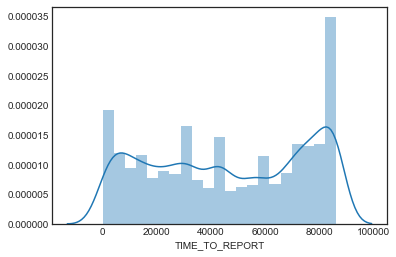

In [106]:
sns.distplot(df_rape['TIME_TO_REPORT'].dt.seconds )
# Seconds is everything less than days

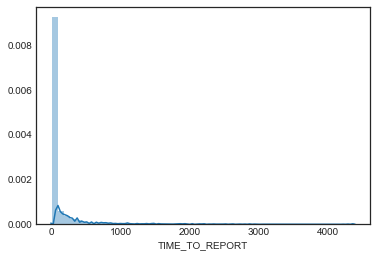

In [107]:
# Number of days until report
sns.distplot(df_rape["TIME_TO_REPORT"].dt.days )

# Feature Engineering

In [110]:
import datetime

In [111]:
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [113]:
df_model.shape

(15746, 141)

In [114]:
df_model

,153.0,155.0,157.0,159.0,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,1.0,...,SOCIAL CLUB/POLICY,STORAGE FACILITY,STORE UNCLASSIFIED,STREET,TAXI (LIVERY LICENSED),TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TRANSIT - NYC SUBWAY,TRANSIT FACILITY (OTHER),VARIETY STORE
21,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
821,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1079,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1754,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2086,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2269,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2716,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3199,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3346,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# The outcome variable, rape completed vs attempted
df_model['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    13955
ATTEMPTED     1791
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [118]:
test_x = df_model.sample(n = 1791)

In [119]:
test_x.shape

(1791, 142)

In [121]:
df_model_y = df_model.loc[df_model['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED']

In [122]:
df_model_X = df_model.loc[df_model['CRM_ATPT_CPTD_CD'] == 'COMPLETED'].sample(n = 1791)

In [123]:
df_model_X.shape

(1791, 142)

In [151]:
df_model_X

,153.0,155.0,157.0,159.0,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,1.0,...,STORAGE FACILITY,STORE UNCLASSIFIED,STREET,TAXI (LIVERY LICENSED),TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TRANSIT - NYC SUBWAY,TRANSIT FACILITY (OTHER),VARIETY STORE,CRM_ATPT_CPTD_CD
2230357,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
2010348,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
4978090,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
680907,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
4055083,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
4048110,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
962654,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
5725800,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
5908753,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
5411236,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED


In [132]:
df_model_y

,153.0,155.0,157.0,159.0,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,1.0,...,STORAGE FACILITY,STORE UNCLASSIFIED,STREET,TAXI (LIVERY LICENSED),TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TRANSIT - NYC SUBWAY,TRANSIT FACILITY (OTHER),VARIETY STORE,CRM_ATPT_CPTD_CD
2716,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED
12299,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED
12860,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED
17607,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED
23965,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED
25885,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,ATTEMPTED
27448,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED
29463,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED
31482,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED
35769,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ATTEMPTED


In [127]:
df_balanced_model['CRM_ATPT_CPTD_CD'].value_counts()

Series([], Name: CRM_ATPT_CPTD_CD, dtype: int64)

In [148]:
df_model_X.shape

(1791, 142)

In [156]:
df_balanced = df_model_X.append(df_model_y)

In [157]:
df_balanced

,153.0,155.0,157.0,159.0,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,1.0,...,STORAGE FACILITY,STORE UNCLASSIFIED,STREET,TAXI (LIVERY LICENSED),TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TRANSIT - NYC SUBWAY,TRANSIT FACILITY (OTHER),VARIETY STORE,CRM_ATPT_CPTD_CD
2230357,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
2010348,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
4978090,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
680907,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
4055083,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
4048110,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
962654,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
5725800,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
5908753,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED
5411236,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,COMPLETED


In [162]:
df_balanced['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    1791
ATTEMPTED    1791
Name: CRM_ATPT_CPTD_CD, dtype: int64

# Run the model

In [169]:
X = df_balanced.drop(['CRM_ATPT_CPTD_CD'], axis=1)

In [170]:
X

,153.0,155.0,157.0,159.0,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,1.0,...,SOCIAL CLUB/POLICY,STORAGE FACILITY,STORE UNCLASSIFIED,STREET,TAXI (LIVERY LICENSED),TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TRANSIT - NYC SUBWAY,TRANSIT FACILITY (OTHER),VARIETY STORE
2230357,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2010348,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4978090,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
680907,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4055083,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4048110,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962654,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5725800,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5908753,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5411236,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
y = df_balanced['CRM_ATPT_CPTD_CD']

In [172]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [173]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2865, 141) (2865,)
(717, 141) (717,)


In [175]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [176]:
rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X, y, cv=5)

array([0.90668524, 0.93156425, 0.92178771, 0.88826816, 0.90083799])

In [178]:
cross_val_score(rfc, X, y, cv=10)

array([0.92777778, 0.89664804, 0.93575419, 0.93296089, 0.9301676 ,
       0.91899441, 0.90502793, 0.87430168, 0.90782123, 0.89664804])